In [1]:
!pip install genism

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


In [2]:
import gensim.downloader as api

# Load pre-trained vectors trained on part of Google News dataset (about 100 billion words).
# The model contains 300-dimensional vectors for 3 million words and phrases.
model = api.load('word2vec-google-news-300')

print("\nTop 10 words most similar to dog:")
print(model.most_similar("dog"))

print("\nSimilarity between day and night.")
print(model.similarity("day", "night"))

print ("\nThe imposter among [breakfast, lunch, dinner, chocolate] is:")
print(model.doesnt_match("breakfast lunch dinner chocolate".split()))



[=================================================-] 99.8% 1660.0/1662.8MB downloaded

Top 10 words most similar to dog:
[('dogs', 0.8680489659309387), ('puppy', 0.8106428384780884), ('pit_bull', 0.780396044254303), ('pooch', 0.7627376914024353), ('cat', 0.7609457969665527), ('golden_retriever', 0.7500901818275452), ('German_shepherd', 0.7465174198150635), ('Rottweiler', 0.7437615394592285), ('beagle', 0.7418621778488159), ('pup', 0.740691065788269)]

Similarity between day and night.
0.50700074

The imposter among [breakfast, lunch, dinner, chocolate] is:
chocolate


In [3]:
print("\nTop 10 words most similar to porcupine:")
print(model.most_similar("monkey"))

print("\nSimilarity between porcupine and dogs.")
print(model.similarity("monkey", "dongs"))

print ("\nThe imposter among [breakfast, lunch, dinner, Mahan] is:")
print(model.doesnt_match("breakfast lunch dinner Mahan".split()))



Top 10 words most similar to porcupine:
[('monkeys', 0.7102549076080322), ('gorilla', 0.6353992819786072), ('ape', 0.6170220971107483), ('snake', 0.605661928653717), ('chimp', 0.5915744304656982), ('flinging_poo', 0.5828945636749268), ('rabbit', 0.5765780806541443), ('lizard', 0.5755525827407837), ('capuchin_species', 0.5743163824081421), ('frog', 0.571554958820343)]

Similarity between porcupine and dogs.
0.29428613

The imposter among [breakfast, lunch, dinner, Mahan] is:
Mahan


In [4]:
# import nltk for tokenizing sentences and words
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
# import word2vec model
import gensim
from gensim.models import Word2Vec

# Reads ‘alice.txt’ file
data_file = open("./gingerbread_man.txt", encoding="utf8")
text = data_file.read()

# Replaces escape character with space
cleaned_text = text.replace("\n", " ")

data = []

# iterate through each sentence in the file
for sentence in sent_tokenize(cleaned_text):
    words = []

    # tokenize the sentence into words
    for word in word_tokenize(sentence):
        words.append(word.lower())

    data.append(words)

# Create CBOW model
cbow_model = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                    window=5, batch_words=1000)

# Print results
print("\nSKIP CBOW Model")
print("Similarity score between 'tail' " +
      "and 'fox' - CBOW : ",
      cbow_model.wv.similarity('tail', 'fox'))

# Print results
print("Most similar words to fox and tail - CBOW : ",
      cbow_model.wv.most_similar('tail', 'fox'))

# Create Skip Gram model
print("\nSKIP GRAM Model")
skip_gram_model = gensim.models.Word2Vec(data, min_count=1,
                                         vector_size=100, window=5,
                                         batch_words = 1000, sg=1)

# Print results
print("Similarity score between 'tail' " +
      "and 'fox' - Skip Gram : ",
      skip_gram_model.wv.similarity('tail', 'fox'))

# Print results
print("Most similar to 'tail' and 'fox' - Skip Gram : ",
      skip_gram_model.wv.most_similar('tail', 'fox'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


FileNotFoundError: ignored

In [8]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Read the data
df = pd.read_csv('./FakeNews.csv')

#Get shape and head
print(df.shape)
print(df.head())
pd.set_option('display.max_colwidth', None)
print(df.head(1))

# Fake Articles
print("Number of FAKE articles: " + str(np.sum(df['label'] == 'FAKE')))

# Real Articles
print("Number of REAL articles: " + str(np.sum(df['label'] == 'REAL')))

# Fake Articles
print("Number of FAKE articles: " + str(np.sum(df['label'] == 'FAKE')))

# Real Articles
print("Number of REAL articles: " + str(np.sum(df['label'] == 'REAL')))

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=7)

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(tfidf_train,y_train)

#- Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

# Creating classification report
print(classification_report(y_test, y_pred))

(6335, 4)
      id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
     id                         title  \
0  8476  You Can Smell Hillary’s Fear   

                                                                                                                                                                  

In [9]:
data = np.array(['Mahan is going to space.', 'Mahan studies at BCIT.'])
series = pd.Series(data)
# Transform the data
tfidf_data = tfidf_vectorizer.transform(series)

# Make a prediction
y_pred_data = pac.predict(tfidf_data)

# Print the predictions
for i in range(len(series)):
    if y_pred_data[i] == 'FAKE':
        print(f"The statement '{series[i]}' is FAKE.")
    else:
        print(f"The statement '{series[i]}' is TRUE.")



The statement 'Mahan is going to space.' is FAKE.
The statement 'Mahan studies at BCIT.' is FAKE.


In [10]:
# Here are all the imports that we'll need. Please comment out if you have them installed (not neccessary just for peace of mind).
import sys
!{sys.executable} -m pip install trulens
!{sys.executable} -m pip install torchvision
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install torchsummary
!{sys.executable} -m pip install torch
!{sys.executable} -m pip install IPython
!{sys.executable} -m pip install numpy --upgrade
!{sys.executable} -m pip install Pillow



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 KB 3.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [11]:
# Import all the libraries we'll need
import json
import PIL
import requests
import scipy.misc
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import tensorflow as tf
import torchvision.utils as utils
import torchvision.models as models
import torchvision.transforms as transforms
from IPython.display import Image, display
from tensorflow import keras
from torchsummary import summary
from torch.autograd import Variable
from trulens.nn.attribution import InputAttribution
from trulens.nn.attribution import IntegratedGradients
from trulens.visualizations import ChannelMaskVisualizer
from trulens.visualizations import MaskVisualizer
from trulens.visualizations import HeatmapVisualizer
from trulens.nn.models import get_model_wrapper
from trulens.nn.attribution import InternalInfluence
from trulens.nn.distributions import PointDoi
from trulens.nn.quantities import ClassQoI, InternalChannelQoI, MaxClassQoI
from trulens.nn.slices import Cut, InputCut, OutputCut, Slice


In [12]:
# Display matplotlib figures in the cell
%matplotlib inline


In [13]:
# Create a Pytorch VGG16 model
pytorch_model = models.vgg16(pretrained=True)
device = 'cpu'
 
# Produce a wrapped model from the pytorch model for Trulens.
wrapped_model = get_model_wrapper(pytorch_model, input_shape=(3,224,224), device=device)
print(summary(pytorch_model, (3, 224, 224)))




/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

INFO:trulens:lib level=1
INFO:trulens:root level=30
INFO:trulens:Detected pytorch backend for <class 'torchvision.models.vgg.VGG'>.
INFO:trulens:Changing backend from None to Backend.PYTORCH.
INFO:trulens:If this seems incorrect, you can force the correct backend by passing the `backend` parameter directly into your get_model_wrapper call.


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

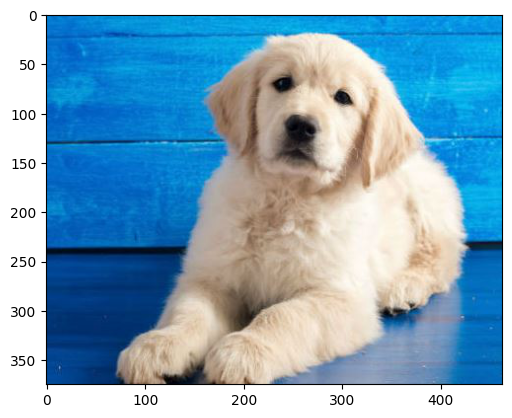

In [27]:

from PIL import Image


url = "/content/dog.JPG"
# "C:\Users\mahan\Desktop\dog.JPG"
with PIL.Image.open(url) as img:
    x = np.array(img.resize((224,224), PIL.Image.ANTIALIAS))[np.newaxis]
 
    # Pre-process uploaded image
    normalize = transforms.Compose([
        transforms.ToTensor(), # convert to [0, 1]
         
        # Means and stddevs of ImageNet (calculated from their image library)
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])])
    processed_image = np.array(normalize(x[0])).transpose(1, 2, 0)[np.newaxis]
 
    # Transpose to [*, C, H, W] for PyTorch convention.
    x = x.transpose(0, 3, 1, 2)
    processed_image = processed_image.transpose(0, 3, 1, 2)
    plt.imshow(img)


In [28]:
# we will save the conv layer weights in this list
model_weights =[]
 
#we will save the 13 conv layers in this list
conv_layers = []
 
# get all the model children as list
model_children1 = list(pytorch_model.children())
model_children = model_children1[0]
 
#counter to keep count of the conv layers
counter = 0
 
#append all the conv layers and their weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")



Total convolution layers: 13


In [29]:
# run the model with cuda if available, else use cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_model = pytorch_model.to(device)
 
# show how transformations change image shape
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])])
image = transform(img)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
     
joined = list(zip(names,outputs))    
for i in joined:
    print(f"Name: {i[0]}; Shape:{i[1].shape}")

outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
     
joined = list(zip(names,outputs))    
for i in joined:
    print(f"Name: {i[0]}; Shape:{i[1].shape}")



Image shape before: torch.Size([3, 224, 224])
Image shape after: torch.Size([1, 3, 224, 224])
Name: Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 64, 224, 224])
Name: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 64, 224, 224])
Name: Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 128, 224, 224])
Name: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 128, 224, 224])
Name: Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 256, 224, 224])
Name: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 256, 224, 224])
Name: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 256, 224, 224])
Name: Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)); Shape:torch.Size([1, 512, 224, 224])
Name: Conv2d(512, 

RuntimeError: ignored

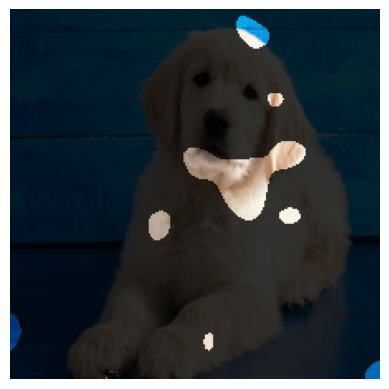

In [33]:
from trulens.nn.attribution import InputAttribution
from trulens.nn.attribution import IntegratedGradients
from trulens.visualizations import MaskVisualizer
 
# A mask is applied to reveal the top threshold % of pixels by attribution.
infl         = InputAttribution(wrapped_model)
attrs_input  = infl.attributions(processed_image)
masked_image = MaskVisualizer(blur=10, threshold=0.95)(attrs_input, x)


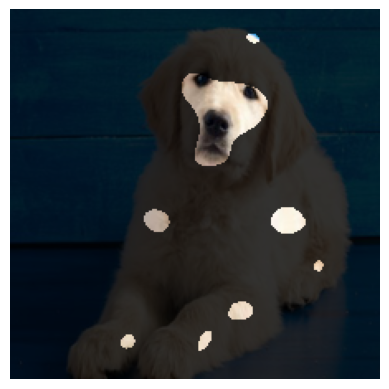

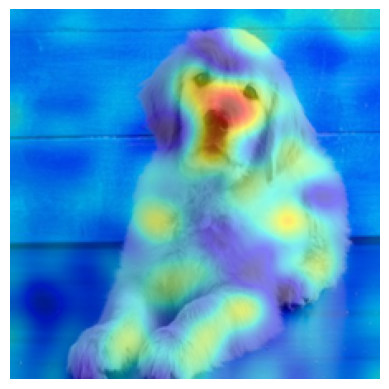

In [34]:
infl         = IntegratedGradients(wrapped_model, resolution=10)
attrs_input  = infl.attributions(processed_image)
masked_image = MaskVisualizer(blur=10, threshold=0.95)(attrs_input, x)

infl         = IntegratedGradients(wrapped_model, resolution=10)
attrs_input  = infl.attributions(processed_image)
masked_image = HeatmapVisualizer(blur=10)(attrs_input, x)



In [35]:
from trulens.nn.attribution   import InternalInfluence
from trulens.nn.distributions import PointDoi
from trulens.nn.quantities    import ClassQoI, InternalChannelQoI, MaxClassQoI
from trulens.nn.slices        import Cut, InputCut, OutputCut, Slice

# Slice defines a layer to use for internal attributions.  

# QoI (quantity of interest), defines the model behavior to explain using 
# attributions, it is the output of some layer.

# DoI (distribution of interest) specifies points surrounding each record for
# attribution calculations.
 
# Define the influence measure.
infl = InternalInfluence(
    wrapped_model, 
    Slice(Cut('features_28'), OutputCut()), 
    MaxClassQoI(),
    PointDoi())
 
attrs_internal = infl.attributions(processed_image).sum(axis=(2,3))



In [36]:
# Define the influence measure.
infl = InternalInfluence(wrapped_model, 'features_28', 'max', 'point')
 
# Get the attributions for the internal neurons at layer 'features_28'. Because 
# layer 'features_28' contains 2D feature maps, we take the sum over the width 
# and height of the feature maps to obtain a single attribution for each feature 
# map.
attrs_internal = infl.attributions(processed_image).sum(axis=(2,3))
print(f"Number of neurons in layer features_28: {len(attrs_internal[0])}")
 
top_feature_map = int(attrs_internal[0].argmax())
 
print('Top feature map:', top_feature_map)



Number of neurons in layer features_28: 512
Top feature map: 151


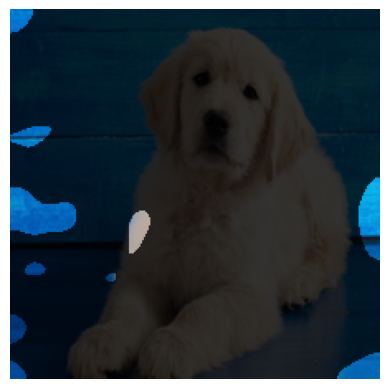

In [38]:
# Since feature maps represent learned features we can’t easily interepret them
# But Trulens can use a second set of attributions to find input features that are 
# most important in defining THIS particular feature map
masked_image = ChannelMaskVisualizer(
    wrapped_model,
    'features_27',
    top_feature_map,
    blur=10,
    threshold=0.95)(x, processed_image)
plt.axis('off')
plt.imshow(masked_image[0].transpose((1,2,0)))
